In [51]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.integrate import simps, quad
from scipy.interpolate import interp1d

In [20]:
rho = 2.7 # density of aluminium [g / cm^3]

In [15]:
energy = []
stopping = []

with open("data.txt", "r") as f:
    for line in f.readlines():
        energy.append(float(line.split("|")[0]))
        stopping.append(float(line.split("|")[1]))
        
energy = np.array(energy)
stopping = np.array(stopping) / rho

In [102]:
Ef_list = np.linspace(0.4, 1)
E0_list = np.zeros_like(Ef_list)

stopping_smooth = interp1d(energy, stopping)
integrand = lambda E: 1 / stopping_smooth(E)

for i, Ef in enumerate(Ef_list):
    
    integral = 0
    
    E0_test = 12.76
    
    while integral < 0.7:
        
        integral = quad(integrand, Ef, E0_test)[0]
        
        E0_test += 0.0001

    E0_list[i] = E0_test
    
    print(i)

/var/folders/nq/xyt9kdz54m940046tt7l5wvm0000gn/T/ipykernel_50296/3987070664.py:15: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = quad(integrand, Ef, E0_test)[0]


0
1
2
3
4
5
6


KeyboardInterrupt: 

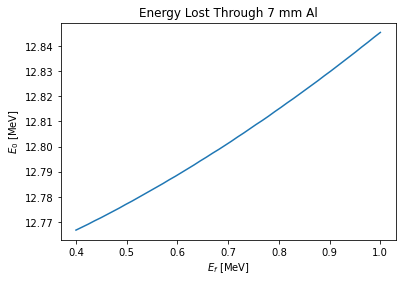

In [113]:
plt.plot(Ef_list, E0_list)

plt.xlabel(r"$E_f$ [MeV]")
plt.ylabel(r"$E_0$ [MeV]")

plt.title("Energy Lost Through 7 mm Al")

plt.savefig("Eloss.jpg", bbox_inches="tight", dpi=300)